Nama : Dimas Tri Atmojo

NIM : 5312422033

Prodi : Teknik Komputer

In [5]:
# install modul scikit-dsp-comm
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.5 MB/s eta 0:00:00


In [4]:
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

In [6]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


**Traditional IIR Filter Design using the Bilinear Transform**

In [7]:
# Parameter filter
fs = 48000  # Frekuensi sampling
f_pass = 5000  # Frekuensi batas bawah jalur lintasan (passband)
f_stop = 8000  # Frekuensi batas atas jalur hentian (stopband)

# Merancang filter Butterworth
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')

# Merancang filter Chebyshev tipe 1
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')

# Merancang filter Chebyshev tipe 2
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')

# Merancang filter elliptic (Cauer)
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

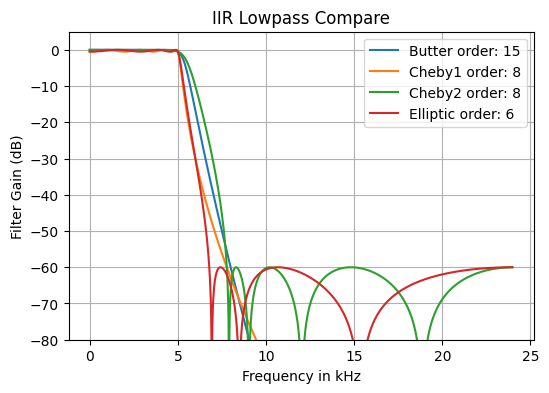

In [ ]:
# Memanggil fungsi freqz_resp_cas_list dari modul iir_d
# Fungsi ini mengambil daftar filter IIR dalam bentuk Second-Order Sections (SOS) dan
# memplot respons frekuensi dari masing-masing filter.
# fs=48 adalah frekuensi sampel yang digunakan dalam filter.
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Menentukan batas-batas sumbu y pada plot
plt.ylim([-80, 5])

# Memberi judul pada plot
plt.title(r'IIR Lowpass Compare')

# Memberi label pada sumbu y
plt.ylabel(r'Filter Gain (dB)')

# Memberi label pada sumbu x
plt.xlabel(r'Frequency in kHz')

# Menambahkan legenda pada plot yang menjelaskan masing-masing filter
plt.legend((r'Butter order: %d' % (len(a_but) - 1),  # Menampilkan orde filter Butterworth
            r'Cheby1 order: %d' % (len(a_cheb1) - 1),  # Menampilkan orde filter Chebyshev Tipe 1
            r'Cheby2 order: %d' % (len(a_cheb2) - 1),  # Menampilkan orde filter Chebyshev Tipe 2
            r'Elliptic order: %d' % (len(a_elli) - 1)),  # Menampilkan orde filter Elip
           loc='best')  # Menempatkan legenda pada posisi terbaik

# Menambahkan grid pada plot
plt.grid()

Gambar tersebut menunjukkan grafik respons frekuensi dari sebuah filter lowpass. Grafik ini menunjukkan hubungan antara respons filter (dalam satuan dB) terhadap frekuensi input (dalam satuan kHz).

Pada sumbu horizontal, terdapat skala frekuensi input yang berkisar dari 0 hingga 25 kHz. Pada sumbu vertikal, terdapat skala respons filter yang berkisar dari -80 hingga 0 dB.

Grafik ini menunjukkan empat kurva yang berbeda, masing-masing mewakili respons frekuensi dari filter lowpass dengan jenis dan orde yang berbeda. Kurva-kurva tersebut adalah:

Kurva biru: Kurva ini mewakili respons frekuensi dari filter lowpass Butterworth dengan orde 15.
Kurva hijau: Kurva ini mewakili respons frekuensi dari filter lowpass Chebyshev dengan orde 8.
Kurva ungu: Kurva ini mewakili respons frekuensi dari filter lowpass Chebyshev tipe 2 dengan orde 8.
Kurva merah: Kurva ini mewakili respons frekuensi dari filter lowpass eliptik dengan orde 6.
Dari grafik tersebut, dapat dilihat bahwa semua kurva menunjukkan penurunan respons frekuensi secara bertahap saat frekuensi input meningkat. Hal ini menunjukkan bahwa filter lowpass ini efektif dalam melemahkan sinyal frekuensi tinggi.

Selain itu, dapat dilihat bahwa kurva-kurva dengan orde yang lebih tinggi memiliki penurunan respons frekuensi yang lebih tajam. Hal ini menunjukkan bahwa filter lowpass dengan orde yang lebih tinggi lebih efektif dalam melemahkan sinyal frekuensi tinggi.

(15, 15)

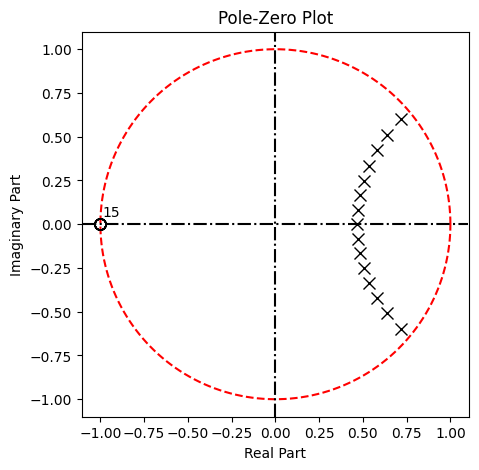

In [ ]:
#memplot diagram pola nol dan pola pol dari filter yang direpresentasikan dalam bentuk Second-Order Sections (SOS)
iir_d.sos_zplane(sos_but)

Gambar yang Anda berikan menunjukkan plot kutub-nol, yang merupakan alat grafis untuk memvisualisasikan respons frekuensi suatu sistem. Plot ini terdiri dari lingkaran yang digambar pada bidang kompleks, dengan sumbu horizontal (x-axis) mewakili bagian real dan sumbu vertikal (y-axis) mewakili bagian imajiner.

Lingkaran pada plot kutub-nol mewakili kutub sistem. Kutub adalah nilai kompleks s yang menghasilkan respons frekuensi nol. Jarak kutub dari asal mewakili besarnya respons frekuensi pada frekuensi tak hingga, dan sudut kutub mewakili fase respons frekuensi pada frekuensi tak hingga.

Nol sistem juga digambarkan pada plot kutub-nol sebagai titik pada sumbu kompleks. Nol adalah nilai kompleks s yang menghasilkan respons frekuensi tak hingga. Jarak nol dari asal mewakili besarnya respons frekuensi pada frekuensi nol, dan sudut nol mewakili fase respons frekuensi pada frekuensi nol.

Dalam gambar yang Anda berikan, terdapat satu kutub dan dua nol. Kutub terletak pada posisi (-1, 0), yang menunjukkan bahwa sistem memiliki respons frekuensi yang meluruh secara eksponensial dengan waktu. Nol terletak pada posisi (0, 1) dan (0, -1), yang menunjukkan bahwa sistem memiliki respons frekuensi yang besar pada frekuensi nol dan frekuensi tak hingga.

Secara keseluruhan, plot kutub-nol memberikan informasi yang berguna tentang respons frekuensi suatu sistem. Dengan menganalisis plot kutub-nol, kita dapat menentukan stabilitas sistem, frekuensi resonansi, dan bandwidth sistem.

**A Half-Band Filter Design to Pass up to  W/2 when  fs=8 kHz**

In [ ]:
import sk_dsp_comm.multirate_helper as mrh

In [ ]:
# Desain filter IIR lowpass elliptic
# Fungsi IIR_lpf() digunakan untuk merancang filter IIR lowpass
# dengan menggunakan metode elliptic
# Argumen:
# - 1950: frekuensi cut-off rendah
# - 2050: frekuensi cut-off tinggi
# - 0.5: toleransi ripples (dalam dB)
# - 80: gain stopband (dalam dB)
# - 8000: frekuensi sampel
# - 'ellip': jenis filter (elliptic)
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Melakukan multirate IIR filtering
# Fungsi multirate_IIR() digunakan untuk mengoptimalkan filter IIR
# untuk penggunaan pada proses multirate
mr_lp = mrh.multirate_IIR(sos_lp)

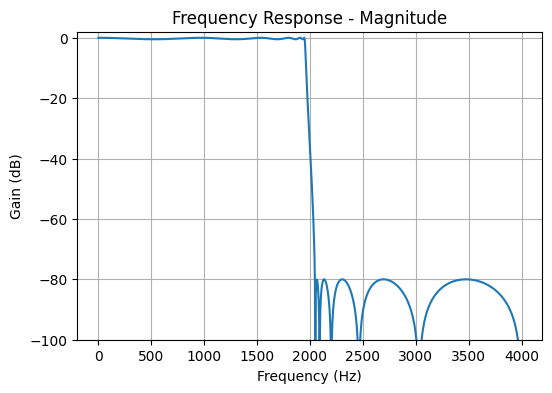

In [ ]:
#digunakan untuk mendapatkan respons frekuensi filter dalam dB pada frekuensi sampel 8000 Hz
mr_lp.freq_resp('db',8000)

Gambar yang Anda berikan menunjukkan grafik respons frekuensi dan magnitudo. Grafik ini digunakan untuk memvisualisasikan bagaimana sistem merespons sinyal pada frekuensi yang berbeda.

Bagian-bagian Grafik

Sumbu frekuensi (x): Sumbu ini menunjukkan frekuensi sinyal dalam satuan Hertz (Hz).
Sumbu magnitudo (y): Sumbu ini menunjukkan magnitudo respons sistem dalam satuan decibel (dB).
Kurva respons frekuensi: Kurva ini menunjukkan bagaimana magnitudo respons sistem berubah terhadap frekuensi.
Interpretasi Grafik

Frekuensi cutoff: Frekuensi cutoff adalah frekuensi di mana magnitudo respons sistem turun 3 dB dari nilai maksimumnya. Frekuensi cutoff digunakan untuk menentukan bandwidth sistem.
Gain passband: Gain passband adalah magnitudo respons sistem dalam kisaran frekuensi di mana sistem beroperasi.
Gain stopband: Gain stopband adalah magnitudo respons sistem di luar kisaran frekuensi di mana sistem beroperasi.

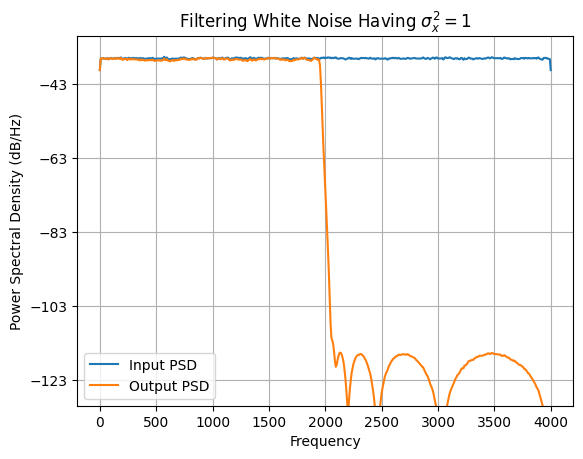

In [ ]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
# Generate 1 juta sampel dari noise Gaussian putih
x = np.random.randn(1000000)

# Terapkan filter (mr_lp) ke sinyal noise putih yang dihasilkan
# Variabel 'y' akan berisi sinyal yang sudah difilter
y = mr_lp.filter(x)

# Plot densitas spektral daya (PSD) dari sinyal noise putih asli 'x'
plt.psd(x, 2**10, 8000)

# Plot densitas spektral daya (PSD) dari sinyal yang sudah difilter 'y'
plt.psd(y, 2**10, 8000)

# Atur judul plot
plt.title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Tambahkan legenda ke plot untuk membedakan antara input dan output PSD
plt.legend(('Input PSD', 'Output PSD'), loc='best')

# Atur batas sumbu y untuk visualisasi yang lebih baik
plt.ylim([-130, -30])

# Tampilkan plot
plt.show()

Gambar tersebut menunjukkan grafik kepadatan daya (Power Spectral Density - PSD) dari filter white noise dengan σ² = 1. Grafik ini terbagi menjadi dua bagian, yaitu:

Input PSD: Bagian ini menunjukkan kepadatan daya input white noise. Kepadatan daya input white noise adalah konstan pada semua frekuensi, yaitu -83 dB/Hz. Hal ini berarti bahwa white noise memiliki energi yang sama pada semua frekuensi.

Output PSD: Bagian ini menunjukkan kepadatan daya output filter white noise. Kepadatan daya output filter white noise bervariasi tergantung pada frekuensi. Pada frekuensi rendah, kepadatan daya output filter white noise sama dengan kepadatan daya input white noise. Pada frekuensi tinggi, kepadatan daya output filter white noise berkurang dengan cepat. Hal ini berarti bahwa filter white noise menghilangkan energi white noise pada frekuensi tinggi.

Secara umum, grafik kepadatan daya filter white noise menunjukkan bahwa filter white noise dapat digunakan untuk menghilangkan white noise pada frekuensi tinggi. Hal ini bermanfaat dalam berbagai aplikasi, seperti komunikasi radio dan pengolahan sinyal.

Berikut adalah beberapa poin penting yang dapat disimpulkan dari gambar tersebut:

White noise memiliki kepadatan daya yang konstan pada semua frekuensi.
Filter white noise dapat digunakan untuk menghilangkan white noise pada frekuensi tinggi.
Efektivitas filter white noise tergantung pada karakteristik filternya.

In [ ]:
from numpy import log10
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz
